In [2]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

In [ ]:
###############################
## Initialization Parameters ##
###############################

intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 1
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 5
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "GREEN")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 4
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
    
    print(Sarsd)
        
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [3]:
intersection = 3
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 10
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuellingDDQN"
actions = 'all_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "2_4":
    intersection = 2
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_delay"
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework


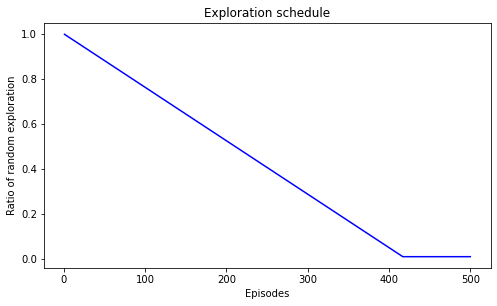

In [4]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [1]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

NameError: name 'MasterDQN_Agent' is not defined

In [6]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int14.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 10
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting S

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147467259), None)

In [19]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int14.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 158
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deploym

Train on 256 samples
256/256 - 0s - loss: 26358.8750
Train on 256 samples
256/256 - 0s - loss: 23487.9082
Train on 256 samples
256/256 - 0s - loss: 22685.0977
Train on 256 samples
256/256 - 0s - loss: 28741.1641
Train on 256 samples
256/256 - 0s - loss: 32572.7539
Train on 256 samples
256/256 - 0s - loss: 22120.4219
Train on 256 samples
256/256 - 0s - loss: 23654.2285
Train on 256 samples
256/256 - 0s - loss: 24886.0918
Train on 256 samples
256/256 - 0s - loss: 24723.8672
Reducing exploration for all agents to 0.6215

Episode 160: Starting computation.
Random Seed Set to 170
Episode 160: Finished running.
Agent 0, Average Reward: -445.62
Train on 256 samples
256/256 - 0s - loss: 23174.7930
Train on 256 samples
256/256 - 0s - loss: 28882.9160
Train on 256 samples
256/256 - 0s - loss: 32960.1406
Train on 256 samples
256/256 - 0s - loss: 29842.4453
Train on 256 samples
256/256 - 0s - loss: 28094.2207
Train on 256 samples
256/256 - 0s - loss: 30124.0820
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 23041.3711
Train on 256 samples
256/256 - 0s - loss: 16221.2139
Train on 256 samples
256/256 - 0s - loss: 22372.2090
Train on 256 samples
256/256 - 0s - loss: 35917.7930
Train on 256 samples
256/256 - 0s - loss: 34944.3359
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.5953

Episode 171: Starting computation.
Random Seed Set to 181
Episode 171: Finished running.
Agent 0, Average Reward: -435.77
Train on 256 samples
256/256 - 0s - loss: 39839.8047
Train on 256 samples
256/256 - 0s - loss: 29924.9414
Train on 256 samples
256/256 - 0s - loss: 43571.5625
Train on 256 samples
256/256 - 0s - loss: 34736.0391
Train on 256 samples
256/256 - 0s - loss: 24895.0977
Train on 256 samples
256/256 - 0s - loss: 27235.8047
Train on 256 samples
256/256 - 0s - loss: 34504.4922
Train on 256 samples
256/256 - 0s - loss: 30766.4980
Train on 256 samples
256/256 - 0s - loss: 26930.3555
Train on 256 samples
256/256 - 0

Train on 256 samples
256/256 - 0s - loss: 36281.6172
Reducing exploration for all agents to 0.5691

Episode 182: Starting computation.
Random Seed Set to 192
Episode 182: Finished running.
Agent 0, Average Reward: -467.69
Train on 256 samples
256/256 - 0s - loss: 29069.8340
Train on 256 samples
256/256 - 0s - loss: 22333.8613
Train on 256 samples
256/256 - 0s - loss: 33341.2031
Train on 256 samples
256/256 - 0s - loss: 23917.3184
Train on 256 samples
256/256 - 0s - loss: 23792.3301
Train on 256 samples
256/256 - 0s - loss: 24359.8340
Train on 256 samples
256/256 - 0s - loss: 36315.2695
Train on 256 samples
256/256 - 0s - loss: 29649.1348
Train on 256 samples
256/256 - 0s - loss: 17381.4141
Train on 256 samples
256/256 - 0s - loss: 30360.9258
Reducing exploration for all agents to 0.5667

Episode 183: Starting computation.
Random Seed Set to 193
Episode 183: Finished running.
Agent 0, Average Reward: -514.77
Train on 256 samples
256/256 - 0s - loss: 34635.8203
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 54391.4180
Train on 256 samples
256/256 - 0s - loss: 34977.9766
Train on 256 samples
256/256 - 0s - loss: 42449.3438
Train on 256 samples
256/256 - 0s - loss: 25566.9512
Train on 256 samples
256/256 - 0s - loss: 46703.3750
Train on 256 samples
256/256 - 0s - loss: 37547.5312
Reducing exploration for all agents to 0.5405

Episode 194: Starting computation.
Random Seed Set to 204
Episode 194: Finished running.
Agent 0, Average Reward: -433.8
Train on 256 samples
256/256 - 0s - loss: 38828.1719
Train on 256 samples
256/256 - 0s - loss: 38345.5078
Train on 256 samples
256/256 - 0s - loss: 68010.6484
Train on 256 samples
256/256 - 0s - loss: 31923.7773
Train on 256 samples
256/256 - 0s - loss: 47119.7578
Train on 256 samples
256/256 - 0s - loss: 32219.7598
Train on 256 samples
256/256 - 0s - loss: 29552.8730
Train on 256 samples
256/256 - 0s - loss: 45660.3008
Train on 256 samples
256/256 - 0s - loss: 30094.3887
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 22794.2344
Train on 256 samples
256/256 - 0s - loss: 29705.0176
Train on 256 samples
256/256 - 0s - loss: 21785.4863
Train on 256 samples
256/256 - 0s - loss: 33261.0938
Train on 256 samples
256/256 - 0s - loss: 27101.0605
Reducing exploration for all agents to 0.4858

Episode 217: Starting computation.
Random Seed Set to 227
Episode 217: Finished running.
Agent 0, Average Reward: -437.16
Train on 256 samples
256/256 - 0s - loss: 28569.9277
Train on 256 samples
256/256 - 0s - loss: 25831.1484
Train on 256 samples
256/256 - 0s - loss: 29336.4766
Train on 256 samples
256/256 - 0s - loss: 34622.6289
Train on 256 samples
256/256 - 0s - loss: 24327.4023
Train on 256 samples
256/256 - 0s - loss: 21265.5059
Train on 256 samples
256/256 - 0s - loss: 23870.2070
Train on 256 samples
256/256 - 0s - loss: 33637.4102
Train on 256 samples
256/256 - 0s - loss: 21905.7324
Train on 256 samples
256/256 - 0s - loss: 21714.5605
Reducing exploration for all agents 

Reducing exploration for all agents to 0.4596

Episode 228: Starting computation.
Random Seed Set to 238
Episode 228: Finished running.
Agent 0, Average Reward: -421.03
Train on 256 samples
256/256 - 0s - loss: 43768.1875
Train on 256 samples
256/256 - 0s - loss: 38196.3008
Train on 256 samples
256/256 - 0s - loss: 40762.4492
Train on 256 samples
256/256 - 0s - loss: 76838.9375
Train on 256 samples
256/256 - 0s - loss: 38677.5977
Train on 256 samples
256/256 - 0s - loss: 54765.0547
Train on 256 samples
256/256 - 0s - loss: 48310.4375
Train on 256 samples
256/256 - 0s - loss: 99038.9609
Train on 256 samples
256/256 - 0s - loss: 36649.5430
Train on 256 samples
256/256 - 0s - loss: 49342.1484
Reducing exploration for all agents to 0.4572

Episode 229: Starting computation.
Random Seed Set to 239
Episode 229: Finished running.
Agent 0, Average Reward: -453.96
Train on 256 samples
256/256 - 0s - loss: 59543.1602
Train on 256 samples
256/256 - 0s - loss: 59953.6797
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 52668.3828
Train on 256 samples
256/256 - 0s - loss: 44245.4414
Train on 256 samples
256/256 - 0s - loss: 36169.2812
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.4048

Episode 251: Starting computation.
Random Seed Set to 261
Episode 251: Finished running.
Agent 0, Average Reward: -456.78
Train on 256 samples
256/256 - 0s - loss: 34121.1367
Train on 256 samples
256/256 - 0s - loss: 31973.1309
Train on 256 samples
256/256 - 0s - loss: 35376.5977
Train on 256 samples
256/256 - 0s - loss: 20235.0234
Train on 256 samples
256/256 - 0s - loss: 30643.9141
Train on 256 samples
256/256 - 0s - loss: 34110.6055
Train on 256 samples
256/256 - 0s - loss: 46574.5742
Train on 256 samples
256/256 - 0s - loss: 38229.2266
Train on 256 samples
256/256 - 0s - loss: 69450.7812
Train on 256 samples
256/256 - 0s - loss: 40268.8555
Reducing exploration for all agents to 0.4024

Episode 252: Starting computation.
Ran

Random Seed Set to 272
Episode 262: Finished running.
Agent 0, Average Reward: -421.1
Train on 256 samples
256/256 - 0s - loss: 92383.0078
Train on 256 samples
256/256 - 0s - loss: 75240.4766
Train on 256 samples
256/256 - 0s - loss: 67919.5391
Train on 256 samples
256/256 - 0s - loss: 40754.1367
Train on 256 samples
256/256 - 0s - loss: 50398.8945
Train on 256 samples
256/256 - 0s - loss: 55054.5898
Train on 256 samples
256/256 - 0s - loss: 75445.6797
Train on 256 samples
256/256 - 0s - loss: 39795.0664
Train on 256 samples
256/256 - 0s - loss: 56052.6289
Train on 256 samples
256/256 - 0s - loss: 46287.0859
Reducing exploration for all agents to 0.3762

Episode 263: Starting computation.
Random Seed Set to 273
Episode 263: Finished running.
Agent 0, Average Reward: -446.52
Train on 256 samples
256/256 - 0s - loss: 43881.4609
Train on 256 samples
256/256 - 0s - loss: 50009.5117
Train on 256 samples
256/256 - 0s - loss: 50135.3789
Train on 256 samples
256/256 - 0s - loss: 43268.0781
Tra

Train on 256 samples
256/256 - 0s - loss: 49189.7773
Train on 256 samples
256/256 - 0s - loss: 35797.2461
Train on 256 samples
256/256 - 0s - loss: 50663.2930
Reducing exploration for all agents to 0.3501

Episode 274: Starting computation.
Random Seed Set to 284
Episode 274: Finished running.
Agent 0, Average Reward: -433.41
Train on 256 samples
256/256 - 0s - loss: 30342.6387
Train on 256 samples
256/256 - 0s - loss: 88620.6016
Train on 256 samples
256/256 - 0s - loss: 35562.1836
Train on 256 samples
256/256 - 0s - loss: 29933.4648
Train on 256 samples
256/256 - 0s - loss: 37214.6602
Train on 256 samples
256/256 - 0s - loss: 26895.1680
Train on 256 samples
256/256 - 0s - loss: 42711.9805
Train on 256 samples
256/256 - 0s - loss: 37584.5820
Train on 256 samples
256/256 - 0s - loss: 29848.4727
Train on 256 samples
256/256 - 0s - loss: 73065.8047
Reducing exploration for all agents to 0.3477

Episode 275: Starting computation.
Random Seed Set to 285
Episode 275: Finished running.
Agent 

Episode 285: Finished running.
Agent 0, Average Reward: -423.12
Train on 256 samples
256/256 - 0s - loss: 106311.9844
Train on 256 samples
256/256 - 0s - loss: 49612.5664
Train on 256 samples
256/256 - 0s - loss: 41592.3867
Train on 256 samples
256/256 - 0s - loss: 72911.5703
Train on 256 samples
256/256 - 0s - loss: 59556.8945
Train on 256 samples
256/256 - 0s - loss: 61883.2305
Train on 256 samples
256/256 - 0s - loss: 43123.4492
Train on 256 samples
256/256 - 0s - loss: 34641.8320
Train on 256 samples
256/256 - 0s - loss: 55437.6953
Train on 256 samples
256/256 - 0s - loss: 53454.1914
Reducing exploration for all agents to 0.3215

Episode 286: Starting computation.
Random Seed Set to 296
Episode 286: Finished running.
Agent 0, Average Reward: -463.09
Train on 256 samples
256/256 - 0s - loss: 38474.0898
Train on 256 samples
256/256 - 0s - loss: 58211.4727
Train on 256 samples
256/256 - 0s - loss: 51060.0742
Train on 256 samples
256/256 - 0s - loss: 34519.9180
Train on 256 samples
256

Train on 256 samples
256/256 - 0s - loss: 54328.5117
Train on 256 samples
256/256 - 0s - loss: 39948.4336
Train on 256 samples
256/256 - 0s - loss: 73958.9922
Train on 256 samples
256/256 - 0s - loss: 26441.6855
Train on 256 samples
256/256 - 0s - loss: 50841.4258
Train on 256 samples
256/256 - 0s - loss: 32951.6445
Reducing exploration for all agents to 0.2953

Episode 297: Starting computation.
Random Seed Set to 307
Episode 297: Finished running.
Agent 0, Average Reward: -413.6
Train on 256 samples
256/256 - 0s - loss: 28979.5762
Train on 256 samples
256/256 - 0s - loss: 36400.3398
Train on 256 samples
256/256 - 0s - loss: 28753.3477
Train on 256 samples
256/256 - 0s - loss: 28408.2910
Train on 256 samples
256/256 - 0s - loss: 35821.9570
Train on 256 samples
256/256 - 0s - loss: 29473.9824
Train on 256 samples
256/256 - 0s - loss: 38028.0781
Train on 256 samples
256/256 - 0s - loss: 29966.4785
Train on 256 samples
256/256 - 0s - loss: 48510.9844
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 64108.8086
Reducing exploration for all agents to 0.2691

Episode 308: Starting computation.
Random Seed Set to 318
Episode 308: Finished running.
Agent 0, Average Reward: -414.07
Train on 256 samples
256/256 - 0s - loss: 57778.5703
Train on 256 samples
256/256 - 0s - loss: 63005.1523
Train on 256 samples
256/256 - 0s - loss: 61289.8867
Train on 256 samples
256/256 - 0s - loss: 49261.0391
Train on 256 samples
256/256 - 0s - loss: 55562.7188
Train on 256 samples
256/256 - 0s - loss: 75093.4688
Train on 256 samples
256/256 - 0s - loss: 47005.0703
Train on 256 samples
256/256 - 0s - loss: 43346.6367
Train on 256 samples
256/256 - 0s - loss: 37617.3477
Train on 256 samples
256/256 - 0s - loss: 45795.0156
Reducing exploration for all agents to 0.2667

Episode 309: Starting computation.
Random Seed Set to 319
Episode 309: Finished running.
Agent 0, Average Reward: -420.17
Train on 256 samples
256/256 - 0s - loss: 58840.5508
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 40547.4453
Train on 256 samples
256/256 - 0s - loss: 44803.6172
Train on 256 samples
256/256 - 0s - loss: 56167.5156
Train on 256 samples
256/256 - 0s - loss: 53137.5586
Train on 256 samples
256/256 - 0s - loss: 84990.0078
Train on 256 samples
256/256 - 0s - loss: 52634.0234
Reducing exploration for all agents to 0.2405

Episode 320: Starting computation.
Random Seed Set to 330
Episode 320: Finished running.
Agent 0, Average Reward: -410.69
Train on 256 samples
256/256 - 0s - loss: 71438.7969
Train on 256 samples
256/256 - 0s - loss: 88250.4609
Train on 256 samples
256/256 - 0s - loss: 45208.0586
Train on 256 samples
256/256 - 0s - loss: 57589.6250
Train on 256 samples
256/256 - 0s - loss: 50936.7344
Train on 256 samples
256/256 - 0s - loss: 52555.1797
Train on 256 samples
256/256 - 0s - loss: 95680.9922
Train on 256 samples
256/256 - 0s - loss: 68318.5234
Train on 256 samples
256/256 - 0s - loss: 57658.1562
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 11806.5859
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.2143

Episode 331: Starting computation.
Random Seed Set to 341
Episode 331: Finished running.
Agent 0, Average Reward: -468.45
Train on 256 samples
256/256 - 0s - loss: 19969.9102
Train on 256 samples
256/256 - 0s - loss: 11701.5449
Train on 256 samples
256/256 - 0s - loss: 15662.9346
Train on 256 samples
256/256 - 0s - loss: 16275.7500
Train on 256 samples
256/256 - 0s - loss: 11223.1553
Train on 256 samples
256/256 - 0s - loss: 12534.6670
Train on 256 samples
256/256 - 0s - loss: 19727.6816
Train on 256 samples
256/256 - 0s - loss: 15812.3730
Train on 256 samples
256/256 - 0s - loss: 19578.0293
Train on 256 samples
256/256 - 0s - loss: 11025.6055
Reducing exploration for all agents to 0.212

Episode 332: Starting computation.
Random Seed Set to 342
Episode 332: Finished running.
Agent 0, Average Reward: -406.86
Train on 256 samples
25

Train on 256 samples
256/256 - 0s - loss: 81353.4844
Train on 256 samples
256/256 - 0s - loss: 61701.1797
Train on 256 samples
256/256 - 0s - loss: 49416.8594
Train on 256 samples
256/256 - 0s - loss: 38349.0391
Train on 256 samples
256/256 - 0s - loss: 38553.5625
Train on 256 samples
256/256 - 0s - loss: 31197.5273
Train on 256 samples
256/256 - 0s - loss: 61506.7969
Train on 256 samples
256/256 - 0s - loss: 41875.7812
Train on 256 samples
256/256 - 0s - loss: 42783.6055
Reducing exploration for all agents to 0.1858

Episode 343: Starting computation.
Random Seed Set to 353
Episode 343: Finished running.
Agent 0, Average Reward: -405.99
Train on 256 samples
256/256 - 0s - loss: 59186.4492
Train on 256 samples
256/256 - 0s - loss: 65500.8516
Train on 256 samples
256/256 - 0s - loss: 43663.3438
Train on 256 samples
256/256 - 0s - loss: 70454.1875
Train on 256 samples
256/256 - 0s - loss: 117656.5547
Train on 256 samples
256/256 - 0s - loss: 90184.6953
Train on 256 samples
256/256 - 0s -

Train on 256 samples
256/256 - 0s - loss: 72822.5234
Reducing exploration for all agents to 0.1596

Episode 354: Starting computation.
Random Seed Set to 364
Episode 354: Finished running.
Agent 0, Average Reward: -421.5
Train on 256 samples
256/256 - 0s - loss: 39920.0625
Train on 256 samples
256/256 - 0s - loss: 49365.5039
Train on 256 samples
256/256 - 0s - loss: 32148.2656
Train on 256 samples
256/256 - 0s - loss: 34505.6953
Train on 256 samples
256/256 - 0s - loss: 105682.9375
Train on 256 samples
256/256 - 0s - loss: 83762.9609
Train on 256 samples
256/256 - 0s - loss: 52544.1484
Train on 256 samples
256/256 - 0s - loss: 58388.5586
Train on 256 samples
256/256 - 0s - loss: 66700.7656
Train on 256 samples
256/256 - 0s - loss: 36997.0156
Reducing exploration for all agents to 0.1572

Episode 355: Starting computation.
Random Seed Set to 365
Episode 355: Finished running.
Agent 0, Average Reward: -401.45
Train on 256 samples
256/256 - 0s - loss: 59489.6367
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 52592.5195
Train on 256 samples
256/256 - 0s - loss: 46661.1562
Train on 256 samples
256/256 - 0s - loss: 39958.6875
Train on 256 samples
256/256 - 0s - loss: 37638.2852
Train on 256 samples
256/256 - 0s - loss: 75851.1641
Train on 256 samples
256/256 - 0s - loss: 43210.0312
Train on 256 samples
256/256 - 0s - loss: 40153.5859
Train on 256 samples
256/256 - 0s - loss: 72361.0391
Train on 256 samples
256/256 - 0s - loss: 72349.5703
Reducing exploration for all agents to 0.131

Episode 366: Starting computation.
Random Seed Set to 376
Episode 366: Finished running.
Agent 0, Average Reward: -480.17
Train on 256 samples
256/256 - 0s - loss: 88845.4297
Train on 256 samples
256/256 - 0s - loss: 28845.4102
Train on 256 samples
256/256 - 0s - loss: 132361.7344
Train on 256 samples
256/256 - 0s - loss: 34878.5039
Train on 256 samples
256/256 - 0s - loss: 35480.6406
Train on 256 samples
256/256 - 0s - loss: 71912.8047
Train on 256 samples
256/256 - 0s - 

256/256 - 0s - loss: 99760.4531
Reducing exploration for all agents to 0.1048

Episode 377: Starting computation.
Random Seed Set to 387
Episode 377: Finished running.
Agent 0, Average Reward: -472.05
Train on 256 samples
256/256 - 0s - loss: 80412.5391
Train on 256 samples
256/256 - 0s - loss: 87694.2422
Train on 256 samples
256/256 - 0s - loss: 81404.6562
Train on 256 samples
256/256 - 0s - loss: 66096.0234
Train on 256 samples
256/256 - 0s - loss: 46147.5195
Train on 256 samples
256/256 - 0s - loss: 60120.4883
Train on 256 samples
256/256 - 0s - loss: 48621.8047
Train on 256 samples
256/256 - 0s - loss: 82502.6641
Train on 256 samples
256/256 - 0s - loss: 47896.6641
Train on 256 samples
256/256 - 0s - loss: 82659.0547
Reducing exploration for all agents to 0.1025

Episode 378: Starting computation.
Random Seed Set to 388
Episode 378: Finished running.
Agent 0, Average Reward: -435.63
Train on 256 samples
256/256 - 0s - loss: 55319.6680
Train on 256 samples
256/256 - 0s - loss: 42040

Train on 256 samples
256/256 - 0s - loss: 165117.0312
Train on 256 samples
256/256 - 0s - loss: 82930.6797
Train on 256 samples
256/256 - 0s - loss: 97996.8984
Train on 256 samples
256/256 - 0s - loss: 117347.1250
Train on 256 samples
256/256 - 0s - loss: 132341.8125
Train on 256 samples
256/256 - 0s - loss: 224028.9844
Train on 256 samples
256/256 - 0s - loss: 140221.0156
Train on 256 samples
256/256 - 0s - loss: 103033.2891
Train on 256 samples
256/256 - 0s - loss: 89324.5234
Reducing exploration for all agents to 0.0763

Episode 389: Starting computation.
Random Seed Set to 399
Episode 389: Finished running.
Agent 0, Average Reward: -492.79
Train on 256 samples
256/256 - 0s - loss: 115595.5469
Train on 256 samples
256/256 - 0s - loss: 88960.8203
Train on 256 samples
256/256 - 0s - loss: 146066.9844
Train on 256 samples
256/256 - 0s - loss: 163601.4219
Train on 256 samples
256/256 - 0s - loss: 114033.5391
Train on 256 samples
256/256 - 0s - loss: 102231.1641
Train on 256 samples
256/

Reducing exploration for all agents to 0.0501

Episode 400: Starting computation.
Random Seed Set to 410
Episode 400: Finished running.
Agent 0, Average Reward: -398.86
Train on 256 samples
256/256 - 0s - loss: 102621.5859
Train on 256 samples
256/256 - 0s - loss: 86390.2734
Train on 256 samples
256/256 - 0s - loss: 64102.5703
Train on 256 samples
256/256 - 0s - loss: 60600.0273
Train on 256 samples
256/256 - 0s - loss: 100021.7578
Train on 256 samples
256/256 - 0s - loss: 46778.0625
Train on 256 samples
256/256 - 0s - loss: 100021.0938
Train on 256 samples
256/256 - 0s - loss: 72601.5234
Train on 256 samples
256/256 - 0s - loss: 165345.7344
Train on 256 samples
256/256 - 0s - loss: 79333.1328
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.0477

Episode 

Train on 256 samples
256/256 - 0s - loss: 37972.8086
Train on 256 samples
256/256 - 0s - loss: 70223.9219
Train on 256 samples
256/256 - 0s - loss: 66443.0547
Train on 256 samples
256/256 - 0s - loss: 76694.4297
Train on 256 samples
256/256 - 0s - loss: 44499.2109
Train on 256 samples
256/256 - 0s - loss: 59114.8320
Train on 256 samples
256/256 - 0s - loss: 38566.1641
Train on 256 samples
256/256 - 0s - loss: 50283.0508
Train on 256 samples
256/256 - 0s - loss: 30789.8027
Reducing exploration for all agents to 0.0215

Episode 412: Starting computation.
Random Seed Set to 422
Episode 412: Finished running.
Agent 0, Average Reward: -416.11
Train on 256 samples
256/256 - 0s - loss: 24245.1328
Train on 256 samples
256/256 - 0s - loss: 59575.7578
Train on 256 samples
256/256 - 0s - loss: 24799.7656
Train on 256 samples
256/256 - 0s - loss: 51335.3125
Train on 256 samples
256/256 - 0s - loss: 29301.7148
Train on 256 samples
256/256 - 0s - loss: 52991.6172
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 78500.2422
Train on 256 samples
256/256 - 0s - loss: 60197.9219
Train on 256 samples
256/256 - 0s - loss: 38068.3555
Reducing exploration for all agents to 0.01

Episode 423: Starting computation.
Random Seed Set to 433
Episode 423: Finished running.
Agent 0, Average Reward: -394.06
Train on 256 samples
256/256 - 0s - loss: 98394.0625
Train on 256 samples
256/256 - 0s - loss: 64301.2812
Train on 256 samples
256/256 - 0s - loss: 95487.2734
Train on 256 samples
256/256 - 0s - loss: 95883.6953
Train on 256 samples
256/256 - 0s - loss: 94047.7344
Train on 256 samples
256/256 - 0s - loss: 107328.9141
Train on 256 samples
256/256 - 0s - loss: 121708.0000
Train on 256 samples
256/256 - 0s - loss: 85218.1797
Train on 256 samples
256/256 - 0s - loss: 70202.6484
Train on 256 samples
256/256 - 0s - loss: 83145.2422
Reducing exploration for all agents to 0.01

Episode 424: Starting computation.
Random Seed Set to 434
Episode 424: Finished running.
Agent 0,

Train on 256 samples
256/256 - 0s - loss: 126440.2969
Train on 256 samples
256/256 - 0s - loss: 134685.7344
Train on 256 samples
256/256 - 0s - loss: 205684.9062
Train on 256 samples
256/256 - 0s - loss: 151042.2500
Train on 256 samples
256/256 - 0s - loss: 145776.4062
Train on 256 samples
256/256 - 0s - loss: 146400.9688
Train on 256 samples
256/256 - 0s - loss: 110343.1094
Train on 256 samples
256/256 - 0s - loss: 189053.9688
Train on 256 samples
256/256 - 0s - loss: 190496.8906
Reducing exploration for all agents to 0.01

Episode 435: Starting computation.
Random Seed Set to 445
Episode 435: Finished running.
Agent 0, Average Reward: -553.13
Train on 256 samples
256/256 - 0s - loss: 174272.6562
Train on 256 samples
256/256 - 0s - loss: 68973.4375
Train on 256 samples
256/256 - 0s - loss: 147448.4062
Train on 256 samples
256/256 - 0s - loss: 126132.7891
Train on 256 samples
256/256 - 0s - loss: 150739.1406
Train on 256 samples
256/256 - 0s - loss: 109930.8750
Train on 256 samples
256

Train on 256 samples
256/256 - 0s - loss: 40162.4961
Train on 256 samples
256/256 - 0s - loss: 55765.3203
Train on 256 samples
256/256 - 0s - loss: 103721.3203
Train on 256 samples
256/256 - 0s - loss: 61889.9336
Reducing exploration for all agents to 0.01

Episode 446: Starting computation.
Random Seed Set to 456
Episode 446: Finished running.
Agent 0, Average Reward: -387.89
Train on 256 samples
256/256 - 0s - loss: 89718.1641
Train on 256 samples
256/256 - 0s - loss: 72882.7422
Train on 256 samples
256/256 - 0s - loss: 115427.4141
Train on 256 samples
256/256 - 0s - loss: 148243.2812
Train on 256 samples
256/256 - 0s - loss: 75520.5312
Train on 256 samples
256/256 - 0s - loss: 94312.5547
Train on 256 samples
256/256 - 0s - loss: 144619.9375
Train on 256 samples
256/256 - 0s - loss: 58439.5156
Train on 256 samples
256/256 - 0s - loss: 161228.1875
Train on 256 samples
256/256 - 0s - loss: 107442.2656
Reducing exploration for all agents to 0.01

Episode 447: Starting computation.
Rando

Train on 256 samples
256/256 - 0s - loss: 109061.1484
Train on 256 samples
256/256 - 0s - loss: 69889.9609
Train on 256 samples
256/256 - 0s - loss: 130773.7500
Train on 256 samples
256/256 - 0s - loss: 67274.8828
Train on 256 samples
256/256 - 0s - loss: 59955.9180
Train on 256 samples
256/256 - 0s - loss: 103088.3359
Train on 256 samples
256/256 - 0s - loss: 84693.9141
Train on 256 samples
256/256 - 0s - loss: 112201.0391
Train on 256 samples
256/256 - 0s - loss: 114073.4766
Reducing exploration for all agents to 0.01

Episode 458: Starting computation.
Random Seed Set to 468
Episode 458: Finished running.
Agent 0, Average Reward: -381.37
Train on 256 samples
256/256 - 0s - loss: 108605.7578
Train on 256 samples
256/256 - 0s - loss: 88877.7188
Train on 256 samples
256/256 - 0s - loss: 85402.9141
Train on 256 samples
256/256 - 0s - loss: 84854.8281
Train on 256 samples
256/256 - 0s - loss: 73516.0469
Train on 256 samples
256/256 - 0s - loss: 85419.0469
Train on 256 samples
256/256 - 0

Train on 256 samples
256/256 - 0s - loss: 136743.3125
Train on 256 samples
256/256 - 0s - loss: 77907.6797
Train on 256 samples
256/256 - 0s - loss: 159609.0625
Train on 256 samples
256/256 - 0s - loss: 101838.8047
Reducing exploration for all agents to 0.01

Episode 469: Starting computation.
Random Seed Set to 479
Episode 469: Finished running.
Agent 0, Average Reward: -394.25
Train on 256 samples
256/256 - 0s - loss: 140618.9219
Train on 256 samples
256/256 - 0s - loss: 124821.8594
Train on 256 samples
256/256 - 0s - loss: 189205.9688
Train on 256 samples
256/256 - 0s - loss: 120441.1641
Train on 256 samples
256/256 - 0s - loss: 206863.6250
Train on 256 samples
256/256 - 0s - loss: 98587.1172
Train on 256 samples
256/256 - 0s - loss: 147253.5000
Train on 256 samples
256/256 - 0s - loss: 101623.8281
Train on 256 samples
256/256 - 0s - loss: 125692.1406
Train on 256 samples
256/256 - 0s - loss: 103148.9453
Reducing exploration for all agents to 0.01

Episode 470: Starting computation.

Train on 256 samples
256/256 - 0s - loss: 200764.8594
Train on 256 samples
256/256 - 0s - loss: 115003.3672
Train on 256 samples
256/256 - 0s - loss: 125064.4922
Train on 256 samples
256/256 - 0s - loss: 168613.2500
Train on 256 samples
256/256 - 0s - loss: 80939.5391
Train on 256 samples
256/256 - 0s - loss: 233729.2188
Train on 256 samples
256/256 - 0s - loss: 168802.8750
Train on 256 samples
256/256 - 0s - loss: 112124.0703
Train on 256 samples
256/256 - 0s - loss: 105779.3516
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.01

Episode 481: Starting computation.
Random Seed Set to 491
Episode 481: Finished running.
Agent 0, Average Reward: -380.7
Train on 256 samples
256/256 - 0s - loss: 273868.1875
Train on 256 samples
256/256 - 0s - loss: 196100.6094

Train on 256 samples
256/256 - 0s - loss: 131618.5781
Train on 256 samples
256/256 - 0s - loss: 174734.2500
Train on 256 samples
256/256 - 0s - loss: 116520.5859
Train on 256 samples
256/256 - 0s - loss: 118022.7812
Train on 256 samples
256/256 - 0s - loss: 112564.5391
Train on 256 samples
256/256 - 0s - loss: 205036.5469
Reducing exploration for all agents to 0.01

Episode 492: Starting computation.
Random Seed Set to 502
Episode 492: Finished running.
Agent 0, Average Reward: -504.44
Train on 256 samples
256/256 - 0s - loss: 100095.4453
Train on 256 samples
256/256 - 0s - loss: 122608.3828
Train on 256 samples
256/256 - 0s - loss: 95590.7109
Train on 256 samples
256/256 - 0s - loss: 96182.8672
Train on 256 samples
256/256 - 0s - loss: 64839.1211
Train on 256 samples
256/256 - 0s - loss: 108295.4844
Train on 256 samples
256/256 - 0s - loss: 111076.0156
Train on 256 samples
256/256 - 0s - loss: 149122.9531
Train on 256 samples
256/256 - 0s - loss: 129732.0547
Train on 256 samples
256/2

In [20]:
Balance_int_MultiDQN_Agents.save(episodes)

Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [ ]:
Balance_int_MultiDQN_Agents.demo()

Intersection 14
Agent 14: Training Loss and Average Reward during training successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int14\Agents_Results\DuellingDDQN\Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework/Agent14_Loss_average_reward.json


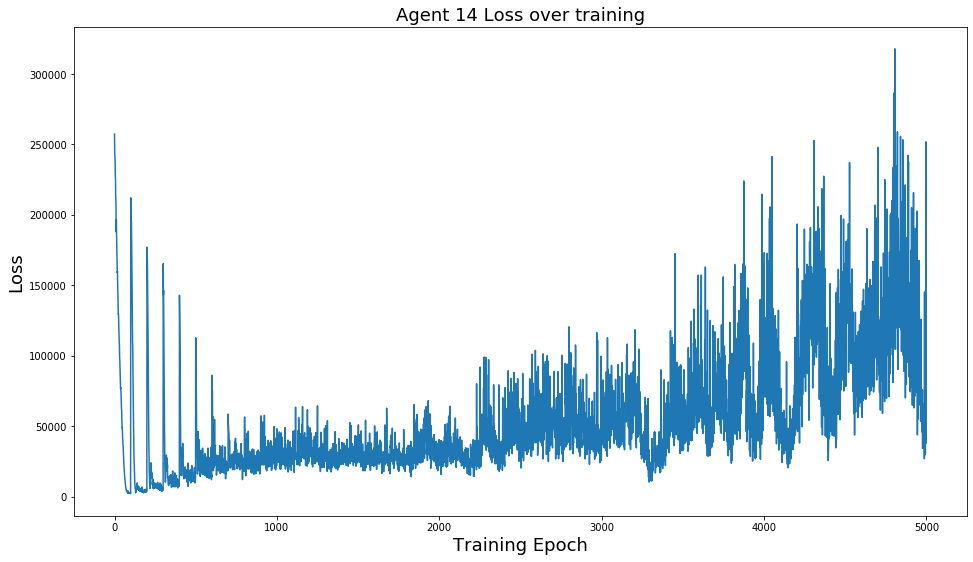

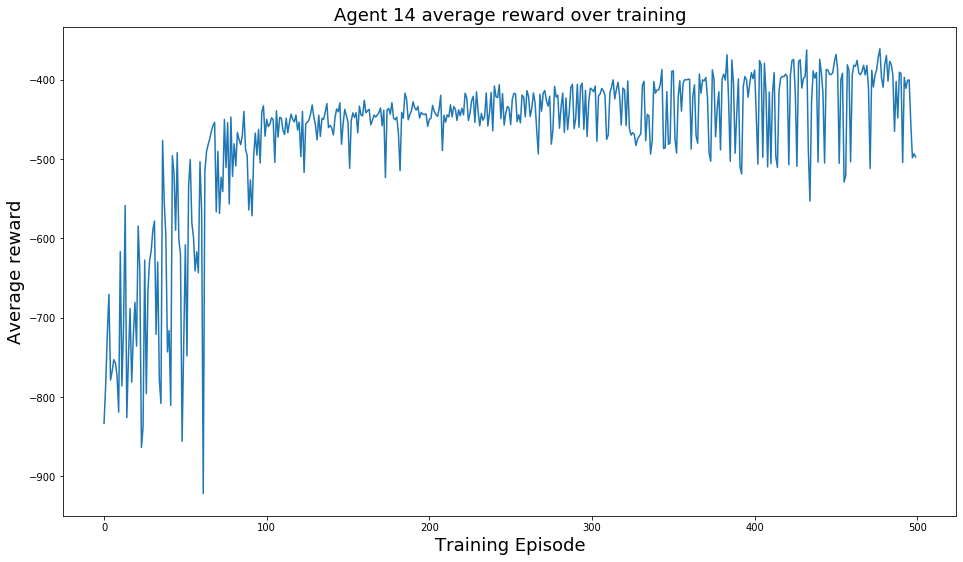

In [21]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [22]:
Balance_int_MultiDQN_Agents.load(500, best = True)

Loading Pre-Trained Agent 13, Architecture, Optimizer and Memory.
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int14\Agents_Results\DuellingDDQN\Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework\BestAgent13.h5
Items successfully loaded.


In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [23]:
Balance_int_MultiDQN_Agents.test()

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int14.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 510
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments

Agent 14: Queues during Test successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int14\Agents_Results\DuellingDDQN\Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework/Junction14_Queues.json
Agent 14: Test Cumulative Delay successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int14\Agents_Results\DuellingDDQN\Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework/Junction14_Cumulative_Delay.json
Agent 14: Test Cumulative Stop Delay successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int14\Agents_Results\DuellingDDQN\Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework/Junction14_Cumulative_Stop_Delay.json


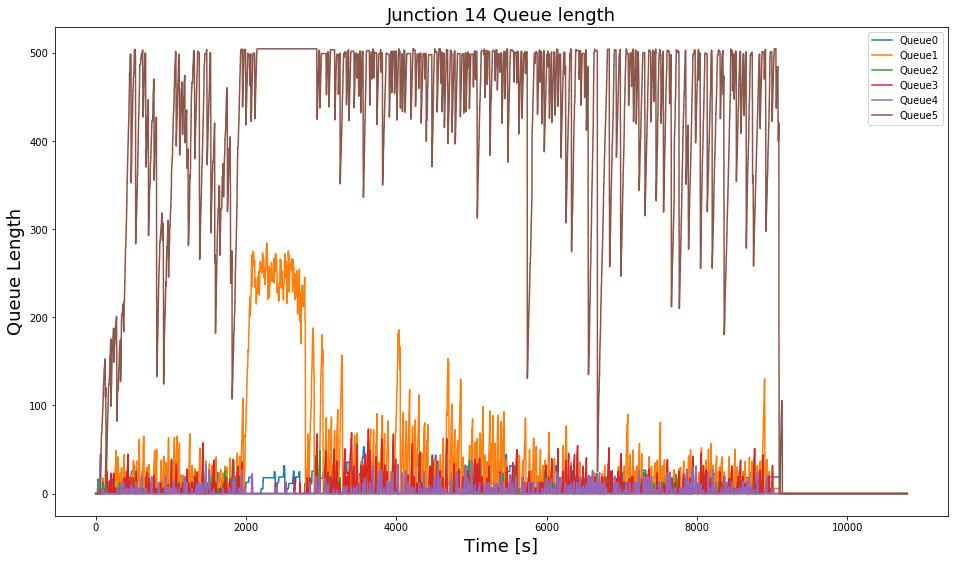

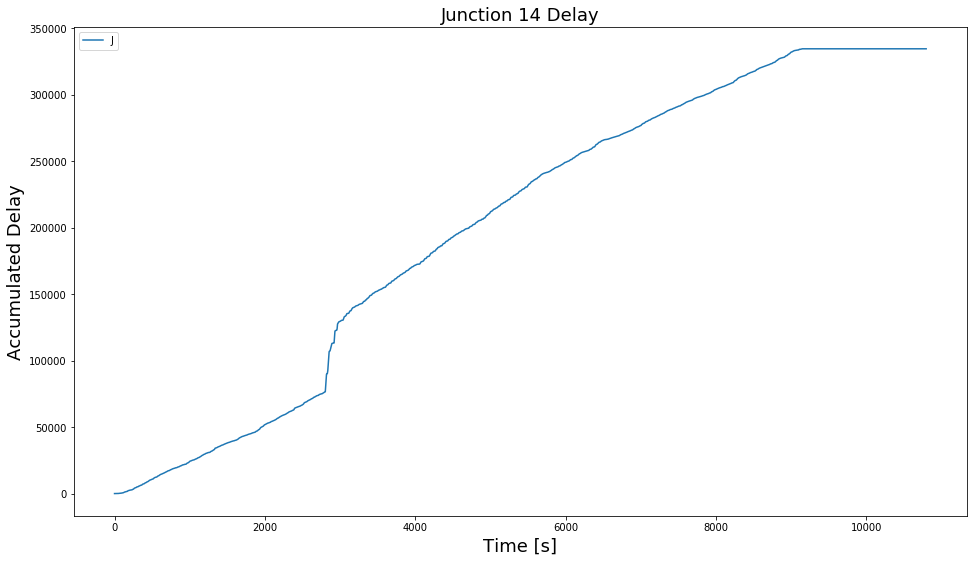

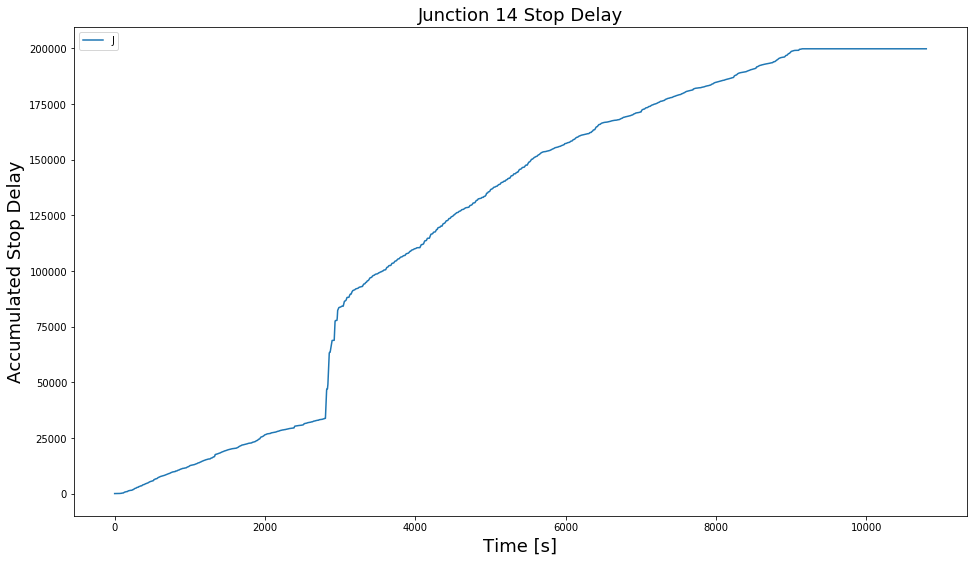

In [24]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



Current simulation: Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework3


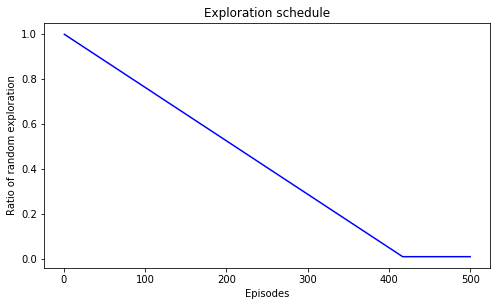

INTERSECTION 13: SETTING UP AGENT
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 24)           168         input_5[0][0]                    
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 24)           600         dense_24[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 24)           600         dense_25[0][0]                   
__________________________________________________________

Train on 256 samples
256/256 - 0s - loss: 106648.3828
Train on 256 samples
256/256 - 0s - loss: 103029.0859
Train on 256 samples
256/256 - 0s - loss: 97658.1484
Train on 256 samples
256/256 - 0s - loss: 95473.1250
Train on 256 samples
256/256 - 0s - loss: 90279.2812
Train on 256 samples
256/256 - 0s - loss: 89751.4609
Train on 256 samples
256/256 - 0s - loss: 87630.5547
Train on 256 samples
256/256 - 0s - loss: 85520.3828
Reducing exploration for all agents to 0.9905

Episode 5: Starting computation.
Random Seed Set to 15
Episode 5: Finished running.
Agent 0, Average Reward: -633.16
Train on 256 samples
256/256 - 0s - loss: 79637.1016
Train on 256 samples
256/256 - 0s - loss: 73781.3906
Train on 256 samples
256/256 - 0s - loss: 76994.8906
Train on 256 samples
256/256 - 0s - loss: 74887.1484
Train on 256 samples
256/256 - 0s - loss: 69615.4922
Train on 256 samples
256/256 - 0s - loss: 69006.0469
Train on 256 samples
256/256 - 0s - loss: 65378.4688
Train on 256 samples
256/256 - 0s - los

Reducing exploration for all agents to 0.9643

Episode 16: Starting computation.
Random Seed Set to 26
Episode 16: Finished running.
Agent 0, Average Reward: -578.98
Saving architecture, weights, optimizer state for best agent-13
Train on 256 samples
256/256 - 0s - loss: 9993.0312
Train on 256 samples
256/256 - 0s - loss: 10104.8652
Train on 256 samples
256/256 - 0s - loss: 10218.7871
Train on 256 samples
256/256 - 0s - loss: 9247.6113
Train on 256 samples
256/256 - 0s - loss: 7777.5420
Train on 256 samples
256/256 - 0s - loss: 8050.7065
Train on 256 samples
256/256 - 0s - loss: 7550.3037
Train on 256 samples
256/256 - 0s - loss: 7687.6069
Train on 256 samples
256/256 - 0s - loss: 7383.5430
Train on 256 samples
256/256 - 0s - loss: 7880.6758
Reducing exploration for all agents to 0.9619

Episode 17: Starting computation.
Random Seed Set to 27
Episode 17: Finished running.
Agent 0, Average Reward: -695.55
Train on 256 samples
256/256 - 0s - loss: 7073.9297
Train on 256 samples
256/256 -

Train on 256 samples
256/256 - 0s - loss: 7455.0586
Train on 256 samples
256/256 - 0s - loss: 7504.4307
Train on 256 samples
256/256 - 0s - loss: 7951.5811
Train on 256 samples
256/256 - 0s - loss: 8071.3892
Train on 256 samples
256/256 - 0s - loss: 6833.4683
Train on 256 samples
256/256 - 0s - loss: 7506.0640
Train on 256 samples
256/256 - 0s - loss: 8354.6113
Reducing exploration for all agents to 0.9357

Episode 28: Starting computation.
Random Seed Set to 38
Episode 28: Finished running.
Agent 0, Average Reward: -804.32
Train on 256 samples
256/256 - 0s - loss: 7808.7676
Train on 256 samples
256/256 - 0s - loss: 7750.7266
Train on 256 samples
256/256 - 0s - loss: 6780.9722
Train on 256 samples
256/256 - 0s - loss: 5841.3232
Train on 256 samples
256/256 - 0s - loss: 6574.7119
Train on 256 samples
256/256 - 0s - loss: 6502.2891
Train on 256 samples
256/256 - 0s - loss: 5312.9106
Train on 256 samples
256/256 - 0s - loss: 5358.5610
Train on 256 samples
256/256 - 0s - loss: 6166.8516
Tr

Random Seed Set to 49
Episode 39: Finished running.
Agent 0, Average Reward: -525.12
Train on 256 samples
256/256 - 0s - loss: 10149.0352
Train on 256 samples
256/256 - 0s - loss: 12285.5938
Train on 256 samples
256/256 - 0s - loss: 10771.7246
Train on 256 samples
256/256 - 0s - loss: 7955.9561
Train on 256 samples
256/256 - 0s - loss: 10528.1211
Train on 256 samples
256/256 - 0s - loss: 11914.0918
Train on 256 samples
256/256 - 0s - loss: 8035.7930
Train on 256 samples
256/256 - 0s - loss: 8452.7344
Train on 256 samples
256/256 - 0s - loss: 9141.7266
Train on 256 samples
256/256 - 0s - loss: 7045.6606
Reducing exploration for all agents to 0.9072

Episode 40: Starting computation.
Random Seed Set to 50
Episode 40: Finished running.
Agent 0, Average Reward: -660.34
Train on 256 samples
256/256 - 0s - loss: 8249.3242
Train on 256 samples
256/256 - 0s - loss: 12216.4434
Train on 256 samples
256/256 - 0s - loss: 7798.9165
Train on 256 samples
256/256 - 0s - loss: 9563.0742
Train on 256 sa

Train on 256 samples
256/256 - 0s - loss: 9542.2070
Train on 256 samples
256/256 - 0s - loss: 13746.4463
Train on 256 samples
256/256 - 0s - loss: 12553.6084
Train on 256 samples
256/256 - 0s - loss: 21287.4258
Train on 256 samples
256/256 - 0s - loss: 14682.3545
Train on 256 samples
256/256 - 0s - loss: 15136.5635
Train on 256 samples
256/256 - 0s - loss: 15840.2002
Train on 256 samples
256/256 - 0s - loss: 13428.1943
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.881

Episode 51: Starting computation.
Random Seed Set to 61
Episode 51: Finished running.
Agent 0, Average Reward: -804.65
Train on 256 samples
256/256 - 0s - loss: 94835.2266
Train on 256 samples
256/256 - 0s - loss: 99136.4609
Train on 256 samples
256/256 - 0s - loss: 88828.5859
Train on 256 samples
256/256 - 0s - loss: 78067.3516
Train on 256 samples
256/256 - 0s - loss: 68131.1094
Train on 256 samples
256/256 - 0s - loss: 59641.5977
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 31589.1953
Train on 256 samples
256/256 - 0s - loss: 24833.8457
Train on 256 samples
256/256 - 0s - loss: 22370.1875
Reducing exploration for all agents to 0.8548

Episode 62: Starting computation.
Random Seed Set to 72
Episode 62: Finished running.
Agent 0, Average Reward: -939.21
Train on 256 samples
256/256 - 0s - loss: 34817.9492
Train on 256 samples
256/256 - 0s - loss: 27827.7969
Train on 256 samples
256/256 - 0s - loss: 23817.0645
Train on 256 samples
256/256 - 0s - loss: 18385.3789
Train on 256 samples
256/256 - 0s - loss: 25177.7656
Train on 256 samples
256/256 - 0s - loss: 32782.6094
Train on 256 samples
256/256 - 0s - loss: 27321.5918
Train on 256 samples
256/256 - 0s - loss: 55436.9414
Train on 256 samples
256/256 - 0s - loss: 39857.6914
Train on 256 samples
256/256 - 0s - loss: 24289.0723
Reducing exploration for all agents to 0.8524

Episode 63: Starting computation.
Random Seed Set to 73
Episode 63: Finished running.
Agent 0, Ave

Train on 256 samples
256/256 - 0s - loss: 41447.8711
Train on 256 samples
256/256 - 0s - loss: 25001.9473
Train on 256 samples
256/256 - 0s - loss: 24223.6289
Train on 256 samples
256/256 - 0s - loss: 33459.1523
Train on 256 samples
256/256 - 0s - loss: 22463.7090
Train on 256 samples
256/256 - 0s - loss: 30992.8398
Train on 256 samples
256/256 - 0s - loss: 24300.6348
Train on 256 samples
256/256 - 0s - loss: 23672.5586
Reducing exploration for all agents to 0.8262

Episode 74: Starting computation.
Random Seed Set to 84
Episode 74: Finished running.
Agent 0, Average Reward: -561.81
Train on 256 samples
256/256 - 0s - loss: 25364.3145
Train on 256 samples
256/256 - 0s - loss: 34373.9531
Train on 256 samples
256/256 - 0s - loss: 21802.1582
Train on 256 samples
256/256 - 0s - loss: 28246.9141
Train on 256 samples
256/256 - 0s - loss: 19874.6895
Train on 256 samples
256/256 - 0s - loss: 27082.9062
Train on 256 samples
256/256 - 0s - loss: 23256.3262
Train on 256 samples
256/256 - 0s - los

Train on 256 samples
256/256 - 0s - loss: 19652.7344
Train on 256 samples
256/256 - 0s - loss: 24622.5645
Train on 256 samples
256/256 - 0s - loss: 17539.1367
Train on 256 samples
256/256 - 0s - loss: 28175.3965
Reducing exploration for all agents to 0.8

Episode 85: Starting computation.
Random Seed Set to 95
Episode 85: Finished running.
Agent 0, Average Reward: -458.93
Train on 256 samples
256/256 - 0s - loss: 22011.7207
Train on 256 samples
256/256 - 0s - loss: 32478.7891
Train on 256 samples
256/256 - 0s - loss: 25605.3574
Train on 256 samples
256/256 - 0s - loss: 32555.8145
Train on 256 samples
256/256 - 0s - loss: 27175.7676
Train on 256 samples
256/256 - 0s - loss: 19241.7324
Train on 256 samples
256/256 - 0s - loss: 24176.5801
Train on 256 samples
256/256 - 0s - loss: 20983.5176
Train on 256 samples
256/256 - 0s - loss: 18742.6621
Train on 256 samples
256/256 - 0s - loss: 33298.2305
Reducing exploration for all agents to 0.7976

Episode 86: Starting computation.
Random Seed Se

Train on 256 samples
256/256 - 0s - loss: 31290.5449
Train on 256 samples
256/256 - 0s - loss: 34131.1797
Train on 256 samples
256/256 - 0s - loss: 21986.3223
Train on 256 samples
256/256 - 0s - loss: 22900.2109
Train on 256 samples
256/256 - 0s - loss: 35758.9648
Train on 256 samples
256/256 - 0s - loss: 38576.9492
Train on 256 samples
256/256 - 0s - loss: 32204.7598
Train on 256 samples
256/256 - 0s - loss: 27715.3047
Reducing exploration for all agents to 0.7714

Episode 97: Starting computation.
Random Seed Set to 107
Episode 97: Finished running.
Agent 0, Average Reward: -475.79
Train on 256 samples
256/256 - 0s - loss: 33005.1914
Train on 256 samples
256/256 - 0s - loss: 35696.7070
Train on 256 samples
256/256 - 0s - loss: 25560.7695
Train on 256 samples
256/256 - 0s - loss: 33609.0391
Train on 256 samples
256/256 - 0s - loss: 28283.8887
Train on 256 samples
256/256 - 0s - loss: 31725.5625
Train on 256 samples
256/256 - 0s - loss: 24549.5176
Train on 256 samples
256/256 - 0s - lo

Train on 256 samples
256/256 - 0s - loss: 26900.3477
Train on 256 samples
256/256 - 0s - loss: 26511.2207
Train on 256 samples
256/256 - 0s - loss: 26594.4023
Train on 256 samples
256/256 - 0s - loss: 27482.7578
Reducing exploration for all agents to 0.7453

Episode 108: Starting computation.
Random Seed Set to 118
Episode 108: Finished running.
Agent 0, Average Reward: -448.98
Train on 256 samples
256/256 - 0s - loss: 26988.8359
Train on 256 samples
256/256 - 0s - loss: 23818.8223
Train on 256 samples
256/256 - 0s - loss: 35518.4258
Train on 256 samples
256/256 - 0s - loss: 32036.6289
Train on 256 samples
256/256 - 0s - loss: 46216.6602
Train on 256 samples
256/256 - 0s - loss: 21688.4902
Train on 256 samples
256/256 - 0s - loss: 28786.4531
Train on 256 samples
256/256 - 0s - loss: 27959.5020
Train on 256 samples
256/256 - 0s - loss: 35258.9688
Train on 256 samples
256/256 - 0s - loss: 25932.4160
Reducing exploration for all agents to 0.7429

Episode 109: Starting computation.
Random 

Train on 256 samples
256/256 - 0s - loss: 23121.3867
Train on 256 samples
256/256 - 0s - loss: 29675.2305
Train on 256 samples
256/256 - 0s - loss: 41342.9531
Train on 256 samples
256/256 - 0s - loss: 24967.7422
Train on 256 samples
256/256 - 0s - loss: 25161.2617
Train on 256 samples
256/256 - 0s - loss: 26461.1074
Train on 256 samples
256/256 - 0s - loss: 25131.0469
Train on 256 samples
256/256 - 0s - loss: 24556.5586
Reducing exploration for all agents to 0.7167

Episode 120: Starting computation.
Random Seed Set to 130
Episode 120: Finished running.
Agent 0, Average Reward: -487.34
Train on 256 samples
256/256 - 0s - loss: 25242.7383
Train on 256 samples
256/256 - 0s - loss: 25142.5898
Train on 256 samples
256/256 - 0s - loss: 23615.9121
Train on 256 samples
256/256 - 0s - loss: 32579.7695
Train on 256 samples
256/256 - 0s - loss: 26812.5703
Train on 256 samples
256/256 - 0s - loss: 24986.7734
Train on 256 samples
256/256 - 0s - loss: 35763.0195
Train on 256 samples
256/256 - 0s - 

256/256 - 0s - loss: 35140.2422
Train on 256 samples
256/256 - 0s - loss: 32626.9609
Train on 256 samples
256/256 - 0s - loss: 27923.8926
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.6905

Episode 131: Starting computation.
Random Seed Set to 141
Episode 131: Finished running.
Agent 0, Average Reward: -435.67
Train on 256 samples
256/256 - 0s - loss: 62144.5625
Train on 256 samples
256/256 - 0s - loss: 45337.9531
Train on 256 samples
256/256 - 0s - loss: 39887.4141
Train on 256 samples
256/256 - 0s - loss: 43869.8828
Train on 256 samples
256/256 - 0s - loss: 30521.1875
Train on 256 samples
256/256 - 0s - loss: 32753.1816
Train on 256 samples
256/256 - 0s - loss: 19857.5254
Train on 256 samples
256/256 - 0s - loss: 55725.1953
Train on 256 samples
256/256 - 0s - loss: 23259.4961
Train on 256 samples
256/256 - 0s - loss: 27166.9648
Reducing exploration for all agents to 0.6881

Episode 132: Starting computation.
Random Seed Set to 142
E

Random Seed Set to 152
Episode 142: Finished running.
Agent 0, Average Reward: -463.7
Train on 256 samples
256/256 - 0s - loss: 56244.2539
Train on 256 samples
256/256 - 0s - loss: 30424.4727
Train on 256 samples
256/256 - 0s - loss: 29269.8594
Train on 256 samples
256/256 - 0s - loss: 23628.4922
Train on 256 samples
256/256 - 0s - loss: 20335.6230
Train on 256 samples
256/256 - 0s - loss: 26610.9805
Train on 256 samples
256/256 - 0s - loss: 27137.5859
Train on 256 samples
256/256 - 0s - loss: 23933.7773
Train on 256 samples
256/256 - 0s - loss: 23789.2109
Train on 256 samples
256/256 - 0s - loss: 50454.1094
Reducing exploration for all agents to 0.6619

Episode 143: Starting computation.
Random Seed Set to 153
Episode 143: Finished running.
Agent 0, Average Reward: -433.49
Train on 256 samples
256/256 - 0s - loss: 21661.2891
Train on 256 samples
256/256 - 0s - loss: 31310.7930
Train on 256 samples
256/256 - 0s - loss: 36418.2383
Train on 256 samples
256/256 - 0s - loss: 29113.2617
Tra

Train on 256 samples
256/256 - 0s - loss: 34210.0156
Train on 256 samples
256/256 - 0s - loss: 32367.6367
Train on 256 samples
256/256 - 0s - loss: 29248.6094
Reducing exploration for all agents to 0.6357

Episode 154: Starting computation.
Random Seed Set to 164
Episode 154: Finished running.
Agent 0, Average Reward: -429.98
Saving architecture, weights, optimizer state for best agent-13
Train on 256 samples
256/256 - 0s - loss: 47948.6133
Train on 256 samples
256/256 - 0s - loss: 30510.2734
Train on 256 samples
256/256 - 0s - loss: 40774.6172
Train on 256 samples
256/256 - 0s - loss: 25215.2559
Train on 256 samples
256/256 - 0s - loss: 24806.4023
Train on 256 samples
256/256 - 0s - loss: 29335.6660
Train on 256 samples
256/256 - 0s - loss: 30428.0449
Train on 256 samples
256/256 - 0s - loss: 30810.2832
Train on 256 samples
256/256 - 0s - loss: 20913.2910
Train on 256 samples
256/256 - 0s - loss: 43561.2422
Reducing exploration for all agents to 0.6334

Episode 155: Starting computati

Random Seed Set to 175
Episode 165: Finished running.
Agent 0, Average Reward: -452.24
Train on 256 samples
256/256 - 0s - loss: 34500.6016
Train on 256 samples
256/256 - 0s - loss: 36318.1641
Train on 256 samples
256/256 - 0s - loss: 23290.5234
Train on 256 samples
256/256 - 0s - loss: 35832.3047
Train on 256 samples
256/256 - 0s - loss: 27801.8438
Train on 256 samples
256/256 - 0s - loss: 36602.7227
Train on 256 samples
256/256 - 0s - loss: 30234.3867
Train on 256 samples
256/256 - 0s - loss: 30748.0352
Train on 256 samples
256/256 - 0s - loss: 25181.0234
Train on 256 samples
256/256 - 0s - loss: 27071.7266
Reducing exploration for all agents to 0.6072

Episode 166: Starting computation.
Random Seed Set to 176
Episode 166: Finished running.
Agent 0, Average Reward: -433.12
Train on 256 samples
256/256 - 0s - loss: 42735.6562
Train on 256 samples
256/256 - 0s - loss: 25941.3242
Train on 256 samples
256/256 - 0s - loss: 29139.7578
Train on 256 samples
256/256 - 0s - loss: 32862.9922
Tr

Train on 256 samples
256/256 - 0s - loss: 20965.5938
Train on 256 samples
256/256 - 0s - loss: 25915.9531
Train on 256 samples
256/256 - 0s - loss: 43528.1250
Reducing exploration for all agents to 0.581

Episode 177: Starting computation.
Random Seed Set to 187
Episode 177: Finished running.
Agent 0, Average Reward: -445.51
Train on 256 samples
256/256 - 0s - loss: 29883.0469
Train on 256 samples
256/256 - 0s - loss: 23808.2266
Train on 256 samples
256/256 - 0s - loss: 24541.8281
Train on 256 samples
256/256 - 0s - loss: 17451.2227
Train on 256 samples
256/256 - 0s - loss: 24877.0781
Train on 256 samples
256/256 - 0s - loss: 21504.3848
Train on 256 samples
256/256 - 0s - loss: 28331.0898
Train on 256 samples
256/256 - 0s - loss: 30091.3945
Train on 256 samples
256/256 - 0s - loss: 33361.2422
Train on 256 samples
256/256 - 0s - loss: 24887.2598
Reducing exploration for all agents to 0.5786

Episode 178: Starting computation.
Random Seed Set to 188
Episode 178: Finished running.
Agent 0

Episode 188: Finished running.
Agent 0, Average Reward: -434.23
Train on 256 samples
256/256 - 0s - loss: 29476.5684
Train on 256 samples
256/256 - 0s - loss: 30979.3926
Train on 256 samples
256/256 - 0s - loss: 29527.3125
Train on 256 samples
256/256 - 0s - loss: 30025.9805
Train on 256 samples
256/256 - 0s - loss: 24438.6992
Train on 256 samples
256/256 - 0s - loss: 43693.5234
Train on 256 samples
256/256 - 0s - loss: 30317.1289
Train on 256 samples
256/256 - 0s - loss: 29258.5449
Train on 256 samples
256/256 - 0s - loss: 21693.3906
Train on 256 samples
256/256 - 0s - loss: 21367.7031
Reducing exploration for all agents to 0.5524

Episode 189: Starting computation.
Random Seed Set to 199
Episode 189: Finished running.
Agent 0, Average Reward: -443.53
Train on 256 samples
256/256 - 0s - loss: 23582.1035
Train on 256 samples
256/256 - 0s - loss: 22951.4277
Train on 256 samples
256/256 - 0s - loss: 30021.9844
Train on 256 samples
256/256 - 0s - loss: 29861.7676
Train on 256 samples
256/

Train on 256 samples
256/256 - 0s - loss: 29723.8750
Train on 256 samples
256/256 - 0s - loss: 24713.1172
Train on 256 samples
256/256 - 0s - loss: 28752.2734
Reducing exploration for all agents to 0.5262

Episode 200: Starting computation.
Random Seed Set to 210
Episode 200: Finished running.
Agent 0, Average Reward: -441.67
Train on 256 samples
256/256 - 0s - loss: 16434.0078
Train on 256 samples
256/256 - 0s - loss: 23968.2168
Train on 256 samples
256/256 - 0s - loss: 26182.6562
Train on 256 samples
256/256 - 0s - loss: 34548.0781
Train on 256 samples
256/256 - 0s - loss: 22547.1484
Train on 256 samples
256/256 - 0s - loss: 22357.0801
Train on 256 samples
256/256 - 0s - loss: 24124.9648
Train on 256 samples
256/256 - 0s - loss: 23592.7734
Train on 256 samples
256/256 - 0s - loss: 27665.7500
Train on 256 samples
256/256 - 0s - loss: 16002.9307
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory

Random Seed Set to 221
Episode 211: Finished running.
Agent 0, Average Reward: -436.86
Train on 256 samples
256/256 - 0s - loss: 32334.8887
Train on 256 samples
256/256 - 0s - loss: 35770.7031
Train on 256 samples
256/256 - 0s - loss: 31471.5352
Train on 256 samples
256/256 - 0s - loss: 26410.1973
Train on 256 samples
256/256 - 0s - loss: 24371.2695
Train on 256 samples
256/256 - 0s - loss: 27352.9199
Train on 256 samples
256/256 - 0s - loss: 29769.2363
Train on 256 samples
256/256 - 0s - loss: 30901.8535
Train on 256 samples
256/256 - 0s - loss: 22197.4863
Train on 256 samples
256/256 - 0s - loss: 27653.2188
Reducing exploration for all agents to 0.4977

Episode 212: Starting computation.
Random Seed Set to 222
Episode 212: Finished running.
Agent 0, Average Reward: -495.23
Train on 256 samples
256/256 - 0s - loss: 34508.4609
Train on 256 samples
256/256 - 0s - loss: 29573.4473
Train on 256 samples
256/256 - 0s - loss: 24588.5762
Train on 256 samples
256/256 - 0s - loss: 24737.7188
Tr

Train on 256 samples
256/256 - 0s - loss: 22048.3027
Train on 256 samples
256/256 - 0s - loss: 33213.3633
Train on 256 samples
256/256 - 0s - loss: 24438.2012
Train on 256 samples
256/256 - 0s - loss: 23400.5918
Train on 256 samples
256/256 - 0s - loss: 23212.3848
Train on 256 samples
256/256 - 0s - loss: 34644.6523
Reducing exploration for all agents to 0.4715

Episode 223: Starting computation.
Random Seed Set to 233
Episode 223: Finished running.
Agent 0, Average Reward: -446.74
Train on 256 samples
256/256 - 0s - loss: 34078.7188
Train on 256 samples
256/256 - 0s - loss: 22512.0723
Train on 256 samples
256/256 - 0s - loss: 33763.4883
Train on 256 samples
256/256 - 0s - loss: 25026.1602
Train on 256 samples
256/256 - 0s - loss: 20480.0059
Train on 256 samples
256/256 - 0s - loss: 20813.2676
Train on 256 samples
256/256 - 0s - loss: 22629.8262
Train on 256 samples
256/256 - 0s - loss: 27005.5449
Train on 256 samples
256/256 - 0s - loss: 26571.2871
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 28398.9883
Train on 256 samples
256/256 - 0s - loss: 23141.6758
Train on 256 samples
256/256 - 0s - loss: 33603.1445
Train on 256 samples
256/256 - 0s - loss: 20833.7734
Train on 256 samples
256/256 - 0s - loss: 23315.9160
Train on 256 samples
256/256 - 0s - loss: 26455.2754
Train on 256 samples
256/256 - 0s - loss: 17570.1621
Train on 256 samples
256/256 - 0s - loss: 22959.5488
Train on 256 samples
256/256 - 0s - loss: 19887.8652
Reducing exploration for all agents to 0.4429

Episode 235: Starting computation.
Random Seed Set to 245
Episode 235: Finished running.
Agent 0, Average Reward: -439.91
Train on 256 samples
256/256 - 0s - loss: 33650.5625
Train on 256 samples
256/256 - 0s - loss: 18745.9160
Train on 256 samples
256/256 - 0s - loss: 29291.8848
Train on 256 samples
256/256 - 0s - loss: 25397.1387
Train on 256 samples
256/256 - 0s - loss: 19004.7676
Train on 256 samples
256/256 - 0s - loss: 22253.3965
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 17577.3828
Train on 256 samples
256/256 - 0s - loss: 21590.6875
Train on 256 samples
256/256 - 0s - loss: 23329.3867
Train on 256 samples
256/256 - 0s - loss: 27840.1094
Reducing exploration for all agents to 0.4167

Episode 246: Starting computation.
Random Seed Set to 256
Episode 246: Finished running.
Agent 0, Average Reward: -433.97
Train on 256 samples
256/256 - 0s - loss: 20661.0527
Train on 256 samples
256/256 - 0s - loss: 23977.3906
Train on 256 samples
256/256 - 0s - loss: 20570.0371
Train on 256 samples
256/256 - 0s - loss: 22713.6172
Train on 256 samples
256/256 - 0s - loss: 15662.1533
Train on 256 samples
256/256 - 0s - loss: 27266.1250
Train on 256 samples
256/256 - 0s - loss: 27245.0703
Train on 256 samples
256/256 - 0s - loss: 24450.4043
Train on 256 samples
256/256 - 0s - loss: 22454.8555
Train on 256 samples
256/256 - 0s - loss: 20911.8379
Reducing exploration for all agents to 0.4143

Episode 247: Starting computation.
Random 

Train on 256 samples
256/256 - 0s - loss: 28020.1738
Train on 256 samples
256/256 - 0s - loss: 20693.8652
Train on 256 samples
256/256 - 0s - loss: 33958.9531
Train on 256 samples
256/256 - 0s - loss: 30321.5410
Train on 256 samples
256/256 - 0s - loss: 30180.0859
Train on 256 samples
256/256 - 0s - loss: 19932.3613
Train on 256 samples
256/256 - 0s - loss: 21781.1738
Train on 256 samples
256/256 - 0s - loss: 17584.5586
Reducing exploration for all agents to 0.3881

Episode 258: Starting computation.
Random Seed Set to 268
Episode 258: Finished running.
Agent 0, Average Reward: -446.46
Train on 256 samples
256/256 - 0s - loss: 32441.6465
Train on 256 samples
256/256 - 0s - loss: 28340.7559
Train on 256 samples
256/256 - 0s - loss: 20235.7480
Train on 256 samples
256/256 - 0s - loss: 21447.9805
Train on 256 samples
256/256 - 0s - loss: 23203.5410
Train on 256 samples
256/256 - 0s - loss: 17985.8926
Train on 256 samples
256/256 - 0s - loss: 21726.1719
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 25320.8203
Train on 256 samples
256/256 - 0s - loss: 15643.9219
Train on 256 samples
256/256 - 0s - loss: 18126.9180
Reducing exploration for all agents to 0.362

Episode 269: Starting computation.
Random Seed Set to 279
Episode 269: Finished running.
Agent 0, Average Reward: -457.53
Train on 256 samples
256/256 - 0s - loss: 21377.0781
Train on 256 samples
256/256 - 0s - loss: 14290.5586
Train on 256 samples
256/256 - 0s - loss: 26024.0723
Train on 256 samples
256/256 - 0s - loss: 16223.3828
Train on 256 samples
256/256 - 0s - loss: 24511.2012
Train on 256 samples
256/256 - 0s - loss: 14212.7705
Train on 256 samples
256/256 - 0s - loss: 25133.8730
Train on 256 samples
256/256 - 0s - loss: 22860.1738
Train on 256 samples
256/256 - 0s - loss: 13876.8457
Train on 256 samples
256/256 - 0s - loss: 23873.1855
Reducing exploration for all agents to 0.3596

Episode 270: Starting computation.
Random Seed Set to 280
Episode 270: Finished running.
Agent 0

Train on 256 samples
256/256 - 0s - loss: 17828.2578
Train on 256 samples
256/256 - 0s - loss: 21283.6309
Train on 256 samples
256/256 - 0s - loss: 14947.7617
Train on 256 samples
256/256 - 0s - loss: 20652.7129
Train on 256 samples
256/256 - 0s - loss: 25538.5312
Train on 256 samples
256/256 - 0s - loss: 20475.1035
Train on 256 samples
256/256 - 0s - loss: 16459.9434
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.3334

Episode 281: Starting computation.
Random Seed Set to 291
Episode 281: Finished running.
Agent 0, Average Reward: -450.38
Train on 256 samples
256/256 - 0s - loss: 24903.6289
Train on 256 samples
256/256 - 0s - loss: 26272.3379
Train on 256 samples
256/256 - 0s - loss: 18365.1035
Train on 256 samples
256/256 - 0s - loss: 14465.3340
Train 

Train on 256 samples
256/256 - 0s - loss: 21357.7441
Train on 256 samples
256/256 - 0s - loss: 15482.8848
Train on 256 samples
256/256 - 0s - loss: 19126.1660
Reducing exploration for all agents to 0.3072

Episode 292: Starting computation.
Random Seed Set to 302
Episode 292: Finished running.
Agent 0, Average Reward: -458.73
Train on 256 samples
256/256 - 0s - loss: 18034.9082
Train on 256 samples
256/256 - 0s - loss: 19436.0645
Train on 256 samples
256/256 - 0s - loss: 20944.7676
Train on 256 samples
256/256 - 0s - loss: 23586.3633
Train on 256 samples
256/256 - 0s - loss: 27223.2500
Train on 256 samples
256/256 - 0s - loss: 18415.7715
Train on 256 samples
256/256 - 0s - loss: 16618.9727
Train on 256 samples
256/256 - 0s - loss: 14019.2900
Train on 256 samples
256/256 - 0s - loss: 25248.9355
Train on 256 samples
256/256 - 0s - loss: 17562.1055
Reducing exploration for all agents to 0.3048

Episode 293: Starting computation.
Random Seed Set to 303
Episode 293: Finished running.
Agent 

Episode 303: Finished running.
Agent 0, Average Reward: -460.94
Train on 256 samples
256/256 - 0s - loss: 19179.6855
Train on 256 samples
256/256 - 0s - loss: 12607.8486
Train on 256 samples
256/256 - 0s - loss: 18473.8926
Train on 256 samples
256/256 - 0s - loss: 27345.0762
Train on 256 samples
256/256 - 0s - loss: 11664.6738
Train on 256 samples
256/256 - 0s - loss: 20679.3027
Train on 256 samples
256/256 - 0s - loss: 20801.1855
Train on 256 samples
256/256 - 0s - loss: 14551.5498
Train on 256 samples
256/256 - 0s - loss: 15080.1562
Train on 256 samples
256/256 - 0s - loss: 18097.8262
Reducing exploration for all agents to 0.2786

Episode 304: Starting computation.
Random Seed Set to 314
Episode 304: Finished running.
Agent 0, Average Reward: -460.59
Train on 256 samples
256/256 - 0s - loss: 19375.5723
Train on 256 samples
256/256 - 0s - loss: 21191.2422
Train on 256 samples
256/256 - 0s - loss: 14456.9736
Train on 256 samples
256/256 - 0s - loss: 10680.4951
Train on 256 samples
256/

256/256 - 0s - loss: 35839.6328
Train on 256 samples
256/256 - 0s - loss: 29977.3242
Train on 256 samples
256/256 - 0s - loss: 41879.8359
Train on 256 samples
256/256 - 0s - loss: 32285.8340
Reducing exploration for all agents to 0.2524

Episode 315: Starting computation.
Random Seed Set to 325
Episode 315: Finished running.
Agent 0, Average Reward: -463.49
Train on 256 samples
256/256 - 0s - loss: 37238.5039
Train on 256 samples
256/256 - 0s - loss: 63851.7617
Train on 256 samples
256/256 - 0s - loss: 45431.9688
Train on 256 samples
256/256 - 0s - loss: 48449.0234
Train on 256 samples
256/256 - 0s - loss: 78094.0938
Train on 256 samples
256/256 - 0s - loss: 36520.4023
Train on 256 samples
256/256 - 0s - loss: 38890.7500
Train on 256 samples
256/256 - 0s - loss: 77790.8047
Train on 256 samples
256/256 - 0s - loss: 37479.4297
Train on 256 samples
256/256 - 0s - loss: 108485.6250
Reducing exploration for all agents to 0.2501

Episode 316: Starting computation.
Random Seed Set to 326
Epis


Episode 326: Starting computation.
Random Seed Set to 336
Episode 326: Finished running.
Agent 0, Average Reward: -417.52
Train on 256 samples
256/256 - 0s - loss: 28134.7207
Train on 256 samples
256/256 - 0s - loss: 46100.9570
Train on 256 samples
256/256 - 0s - loss: 21781.8633
Train on 256 samples
256/256 - 0s - loss: 25373.0098
Train on 256 samples
256/256 - 0s - loss: 42880.2305
Train on 256 samples
256/256 - 0s - loss: 17386.3379
Train on 256 samples
256/256 - 0s - loss: 15661.9814
Train on 256 samples
256/256 - 0s - loss: 19516.5723
Train on 256 samples
256/256 - 0s - loss: 19989.4727
Train on 256 samples
256/256 - 0s - loss: 27481.7598
Reducing exploration for all agents to 0.2239

Episode 327: Starting computation.
Random Seed Set to 337
Episode 327: Finished running.
Agent 0, Average Reward: -410.86
Train on 256 samples
256/256 - 0s - loss: 51330.0117
Train on 256 samples
256/256 - 0s - loss: 18884.5625
Train on 256 samples
256/256 - 0s - loss: 30954.6543
Train on 256 sample

Train on 256 samples
256/256 - 0s - loss: 28213.6738
Train on 256 samples
256/256 - 0s - loss: 29894.9219
Train on 256 samples
256/256 - 0s - loss: 55039.9258
Train on 256 samples
256/256 - 0s - loss: 34507.7969
Train on 256 samples
256/256 - 0s - loss: 42951.6289
Reducing exploration for all agents to 0.1977

Episode 338: Starting computation.
Random Seed Set to 348
Episode 338: Finished running.
Agent 0, Average Reward: -473.45
Train on 256 samples
256/256 - 0s - loss: 32122.4355
Train on 256 samples
256/256 - 0s - loss: 33046.8008
Train on 256 samples
256/256 - 0s - loss: 46708.4414
Train on 256 samples
256/256 - 0s - loss: 34915.1992
Train on 256 samples
256/256 - 0s - loss: 28713.3398
Train on 256 samples
256/256 - 0s - loss: 46650.5391
Train on 256 samples
256/256 - 0s - loss: 35507.9453
Train on 256 samples
256/256 - 0s - loss: 44886.1172
Train on 256 samples
256/256 - 0s - loss: 47522.7227
Train on 256 samples
256/256 - 0s - loss: 44750.4102
Reducing exploration for all agents 

Reducing exploration for all agents to 0.1715

Episode 349: Starting computation.
Random Seed Set to 359
Episode 349: Finished running.
Agent 0, Average Reward: -464.79
Train on 256 samples
256/256 - 0s - loss: 11252.0195
Train on 256 samples
256/256 - 0s - loss: 24747.4727
Train on 256 samples
256/256 - 0s - loss: 16517.7891
Train on 256 samples
256/256 - 0s - loss: 12135.9580
Train on 256 samples
256/256 - 0s - loss: 14700.9395
Train on 256 samples
256/256 - 0s - loss: 24685.9961
Train on 256 samples
256/256 - 0s - loss: 17507.9688
Train on 256 samples
256/256 - 0s - loss: 19215.3594
Train on 256 samples
256/256 - 0s - loss: 18469.3008
Train on 256 samples
256/256 - 0s - loss: 14946.3330
Reducing exploration for all agents to 0.1691

Episode 350: Starting computation.
Random Seed Set to 360
Episode 350: Finished running.
Agent 0, Average Reward: -492.69
Train on 256 samples
256/256 - 0s - loss: 8529.2920
Train on 256 samples
256/256 - 0s - loss: 10201.9668
Train on 256 samples
256/25

Train on 256 samples
256/256 - 0s - loss: 41233.7422
Reducing exploration for all agents to 0.1167

Episode 372: Starting computation.
Random Seed Set to 382
Episode 372: Finished running.
Agent 0, Average Reward: -443.23
Train on 256 samples
256/256 - 0s - loss: 32852.7656
Train on 256 samples
256/256 - 0s - loss: 28153.0547
Train on 256 samples
256/256 - 0s - loss: 24688.0391
Train on 256 samples
256/256 - 0s - loss: 96068.0547
Train on 256 samples
256/256 - 0s - loss: 118244.9922
Train on 256 samples
256/256 - 0s - loss: 12385.7627
Train on 256 samples
256/256 - 0s - loss: 17141.0703
Train on 256 samples
256/256 - 0s - loss: 12940.8154
Train on 256 samples
256/256 - 0s - loss: 13529.4268
Train on 256 samples
256/256 - 0s - loss: 36399.8320
Reducing exploration for all agents to 0.1144

Episode 373: Starting computation.
Random Seed Set to 383
Episode 373: Finished running.
Agent 0, Average Reward: -382.33
Saving architecture, weights, optimizer state for best agent-13
Train on 256 s

Random Seed Set to 393
Episode 383: Finished running.
Agent 0, Average Reward: -542.71
Train on 256 samples
256/256 - 0s - loss: 147370.3281
Train on 256 samples
256/256 - 0s - loss: 146268.9531
Train on 256 samples
256/256 - 0s - loss: 85617.8750
Train on 256 samples
256/256 - 0s - loss: 129895.9375
Train on 256 samples
256/256 - 0s - loss: 143685.8594
Train on 256 samples
256/256 - 0s - loss: 156818.0625
Train on 256 samples
256/256 - 0s - loss: 67255.8438
Train on 256 samples
256/256 - 0s - loss: 65261.1445
Train on 256 samples
256/256 - 0s - loss: 78127.6797
Train on 256 samples
256/256 - 0s - loss: 84323.1875
Reducing exploration for all agents to 0.0882

Episode 384: Starting computation.
Random Seed Set to 394
Episode 384: Finished running.
Agent 0, Average Reward: -845.68
Train on 256 samples
256/256 - 0s - loss: 220979.8906
Train on 256 samples
256/256 - 0s - loss: 84712.6484
Train on 256 samples
256/256 - 0s - loss: 91604.8672
Train on 256 samples
256/256 - 0s - loss: 109682.

Train on 256 samples
256/256 - 0s - loss: 39695.5820
Train on 256 samples
256/256 - 0s - loss: 121380.7578
Train on 256 samples
256/256 - 0s - loss: 124595.4688
Train on 256 samples
256/256 - 0s - loss: 103000.8906
Reducing exploration for all agents to 0.062

Episode 395: Starting computation.
Random Seed Set to 405
Episode 395: Finished running.
Agent 0, Average Reward: -402.75
Train on 256 samples
256/256 - 0s - loss: 22767.0664
Train on 256 samples
256/256 - 0s - loss: 27258.3086
Train on 256 samples
256/256 - 0s - loss: 47622.6055
Train on 256 samples
256/256 - 0s - loss: 30048.1250
Train on 256 samples
256/256 - 0s - loss: 36263.3828
Train on 256 samples
256/256 - 0s - loss: 30140.7148
Train on 256 samples
256/256 - 0s - loss: 31805.3477
Train on 256 samples
256/256 - 0s - loss: 35515.7383
Train on 256 samples
256/256 - 0s - loss: 55628.6289
Train on 256 samples
256/256 - 0s - loss: 88335.3203
Reducing exploration for all agents to 0.0596

Episode 396: Starting computation.
Rando

Random Seed Set to 416
Episode 406: Finished running.
Agent 0, Average Reward: -492.15
Train on 256 samples
256/256 - 0s - loss: 4755.7197
Train on 256 samples
256/256 - 0s - loss: 3083.3992
Train on 256 samples
256/256 - 0s - loss: 5305.3403
Train on 256 samples
256/256 - 0s - loss: 2982.4834
Train on 256 samples
256/256 - 0s - loss: 3983.3755
Train on 256 samples
256/256 - 0s - loss: 4095.0186
Train on 256 samples
256/256 - 0s - loss: 6579.7310
Train on 256 samples
256/256 - 0s - loss: 3959.8193
Train on 256 samples
256/256 - 0s - loss: 7324.1807
Train on 256 samples
256/256 - 0s - loss: 5444.7158
Reducing exploration for all agents to 0.0334

Episode 407: Starting computation.
Random Seed Set to 417
Episode 407: Finished running.
Agent 0, Average Reward: -499.38
Train on 256 samples
256/256 - 0s - loss: 2578.2300
Train on 256 samples
256/256 - 0s - loss: 4114.8999
Train on 256 samples
256/256 - 0s - loss: 3231.3125
Train on 256 samples
256/256 - 0s - loss: 3530.1030
Train on 256 sam

Train on 256 samples
256/256 - 0s - loss: 105339.6719
Train on 256 samples
256/256 - 0s - loss: 66845.4141
Reducing exploration for all agents to 0.01

Episode 418: Starting computation.
Random Seed Set to 428
Episode 418: Finished running.
Agent 0, Average Reward: -508.89
Train on 256 samples
256/256 - 0s - loss: 66101.5938
Train on 256 samples
256/256 - 0s - loss: 25072.0352
Train on 256 samples
256/256 - 0s - loss: 25281.7480
Train on 256 samples
256/256 - 0s - loss: 28350.9961
Train on 256 samples
256/256 - 0s - loss: 34063.5273
Train on 256 samples
256/256 - 0s - loss: 31876.7227
Train on 256 samples
256/256 - 0s - loss: 42300.7227
Train on 256 samples
256/256 - 0s - loss: 36015.7930
Train on 256 samples
256/256 - 0s - loss: 36195.0664
Train on 256 samples
256/256 - 0s - loss: 22437.4023
Reducing exploration for all agents to 0.01

Episode 419: Starting computation.
Random Seed Set to 429
Episode 419: Finished running.
Agent 0, Average Reward: -497.36
Train on 256 samples
256/256 

Train on 256 samples
256/256 - 0s - loss: 67487.5938
Train on 256 samples
256/256 - 0s - loss: 63234.3008
Train on 256 samples
256/256 - 0s - loss: 91703.5469
Train on 256 samples
256/256 - 0s - loss: 54757.8828
Train on 256 samples
256/256 - 0s - loss: 57258.6875
Train on 256 samples
256/256 - 0s - loss: 36679.7656
Train on 256 samples
256/256 - 0s - loss: 72178.9531
Train on 256 samples
256/256 - 0s - loss: 45985.5781
Train on 256 samples
256/256 - 0s - loss: 37736.4297
Reducing exploration for all agents to 0.01

Episode 430: Starting computation.
Random Seed Set to 440
Episode 430: Finished running.
Agent 0, Average Reward: -506.24
Train on 256 samples
256/256 - 0s - loss: 74428.1094
Train on 256 samples
256/256 - 0s - loss: 73759.5938
Train on 256 samples
256/256 - 0s - loss: 30999.7930
Train on 256 samples
256/256 - 0s - loss: 91338.4297
Train on 256 samples
256/256 - 0s - loss: 112511.0703
Train on 256 samples
256/256 - 0s - loss: 37547.7930
Train on 256 samples
256/256 - 0s - l

Episode 452: Finished running.
Agent 0, Average Reward: -876.83
Train on 256 samples
256/256 - 0s - loss: 60712.8555
Train on 256 samples
256/256 - 0s - loss: 90678.0156
Train on 256 samples
256/256 - 0s - loss: 45929.1367
Train on 256 samples
256/256 - 0s - loss: 75305.7656
Train on 256 samples
256/256 - 0s - loss: 70344.4844
Train on 256 samples
256/256 - 0s - loss: 33435.7148
Train on 256 samples
256/256 - 0s - loss: 74511.1953
Train on 256 samples
256/256 - 0s - loss: 39797.5352
Train on 256 samples
256/256 - 0s - loss: 98417.1328
Train on 256 samples
256/256 - 0s - loss: 39773.8477
Reducing exploration for all agents to 0.01

Episode 453: Starting computation.
Random Seed Set to 463
Episode 453: Finished running.
Agent 0, Average Reward: -906.88
Train on 256 samples
256/256 - 0s - loss: 109001.2266
Train on 256 samples
256/256 - 0s - loss: 104816.1797
Train on 256 samples
256/256 - 0s - loss: 92967.5859
Train on 256 samples
256/256 - 0s - loss: 57765.6602
Train on 256 samples
256/

Train on 256 samples
256/256 - 0s - loss: 106761.8672
Train on 256 samples
256/256 - 0s - loss: 147468.9844
Train on 256 samples
256/256 - 0s - loss: 168133.6719
Train on 256 samples
256/256 - 0s - loss: 197447.1562
Train on 256 samples
256/256 - 0s - loss: 142550.1719
Train on 256 samples
256/256 - 0s - loss: 214260.6094
Train on 256 samples
256/256 - 0s - loss: 107128.9141
Reducing exploration for all agents to 0.01

Episode 464: Starting computation.
Random Seed Set to 474
Episode 464: Finished running.
Agent 0, Average Reward: -916.28
Train on 256 samples
256/256 - 0s - loss: 101592.9297
Train on 256 samples
256/256 - 0s - loss: 141040.2031
Train on 256 samples
256/256 - 0s - loss: 93391.6953
Train on 256 samples
256/256 - 0s - loss: 194194.8594
Train on 256 samples
256/256 - 0s - loss: 117833.6328
Train on 256 samples
256/256 - 0s - loss: 226188.1875
Train on 256 samples
256/256 - 0s - loss: 236917.9375
Train on 256 samples
256/256 - 0s - loss: 112634.6719
Train on 256 samples
256

Reducing exploration for all agents to 0.01

Episode 475: Starting computation.
Random Seed Set to 485
Episode 475: Finished running.
Agent 0, Average Reward: -414.41
Train on 256 samples
256/256 - 0s - loss: 83286.8750
Train on 256 samples
256/256 - 0s - loss: 67174.5859
Train on 256 samples
256/256 - 0s - loss: 115469.1172
Train on 256 samples
256/256 - 0s - loss: 121824.2969
Train on 256 samples
256/256 - 0s - loss: 123939.5703
Train on 256 samples
256/256 - 0s - loss: 66163.0156
Train on 256 samples
256/256 - 0s - loss: 130309.6953
Train on 256 samples
256/256 - 0s - loss: 39862.3555
Train on 256 samples
256/256 - 0s - loss: 118582.8203
Train on 256 samples
256/256 - 0s - loss: 74147.4922
Reducing exploration for all agents to 0.01

Episode 476: Starting computation.
Random Seed Set to 486
Episode 476: Finished running.
Agent 0, Average Reward: -402.85
Train on 256 samples
256/256 - 0s - loss: 72268.0391
Train on 256 samples
256/256 - 0s - loss: 77425.6484
Train on 256 samples
256/

Train on 256 samples
256/256 - 0s - loss: 56890.6523
Train on 256 samples
256/256 - 0s - loss: 89002.3906
Train on 256 samples
256/256 - 0s - loss: 51643.8320
Train on 256 samples
256/256 - 0s - loss: 104987.0078
Train on 256 samples
256/256 - 0s - loss: 70187.2578
Train on 256 samples
256/256 - 0s - loss: 77103.0234
Train on 256 samples
256/256 - 0s - loss: 113263.8984
Train on 256 samples
256/256 - 0s - loss: 64616.4766
Reducing exploration for all agents to 0.01

Episode 487: Starting computation.
Random Seed Set to 497
Episode 487: Finished running.
Agent 0, Average Reward: -391.45
Train on 256 samples
256/256 - 0s - loss: 46804.3984
Train on 256 samples
256/256 - 0s - loss: 95934.8906
Train on 256 samples
256/256 - 0s - loss: 99670.7344
Train on 256 samples
256/256 - 0s - loss: 117290.4141
Train on 256 samples
256/256 - 0s - loss: 58367.1836
Train on 256 samples
256/256 - 0s - loss: 72329.7422
Train on 256 samples
256/256 - 0s - loss: 75112.7578
Train on 256 samples
256/256 - 0s -

Random Seed Set to 508
Episode 498: Finished running.
Agent 0, Average Reward: -521.96
Train on 256 samples
256/256 - 0s - loss: 83860.6641
Train on 256 samples
256/256 - 0s - loss: 99905.9141
Train on 256 samples
256/256 - 0s - loss: 72014.2266
Train on 256 samples
256/256 - 0s - loss: 75051.6953
Train on 256 samples
256/256 - 0s - loss: 34552.9023
Train on 256 samples
256/256 - 0s - loss: 108038.8359
Train on 256 samples
256/256 - 0s - loss: 136129.8906
Train on 256 samples
256/256 - 0s - loss: 44961.0273
Train on 256 samples
256/256 - 0s - loss: 65809.7422
Train on 256 samples
256/256 - 0s - loss: 96599.7109
Reducing exploration for all agents to 0.01

Episode 499: Starting computation.
Random Seed Set to 509
Episode 499: Finished running.
Agent 0, Average Reward: -520.96
Train on 256 samples
256/256 - 0s - loss: 33347.1758
Train on 256 samples
256/256 - 0s - loss: 43775.3789
Train on 256 samples
256/256 - 0s - loss: 49938.2773
Train on 256 samples
256/256 - 0s - loss: 24983.5332
Tr

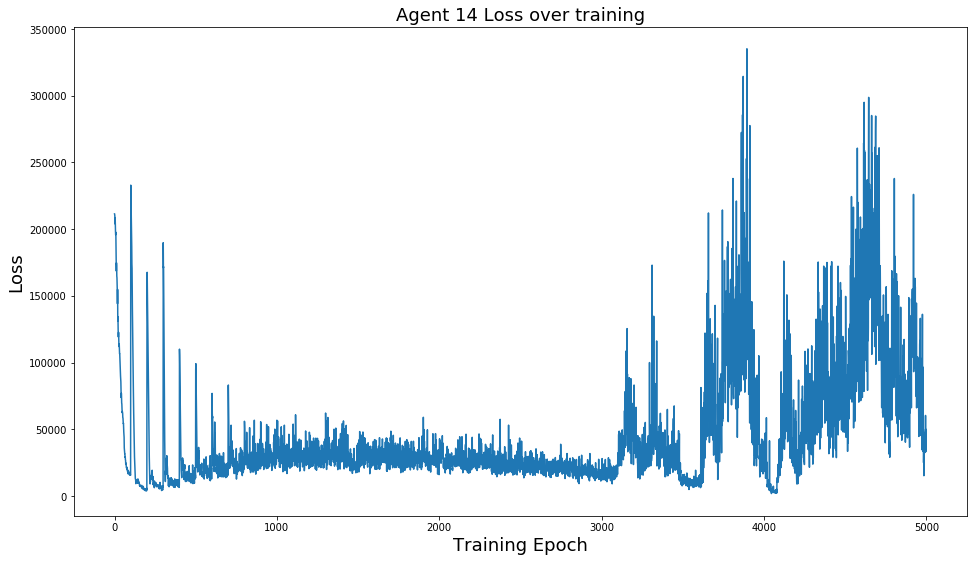

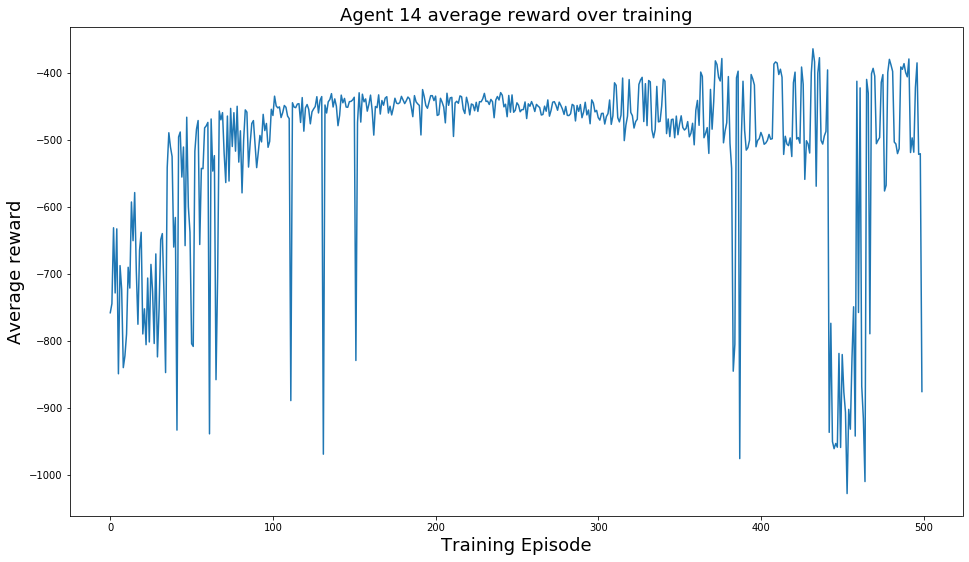

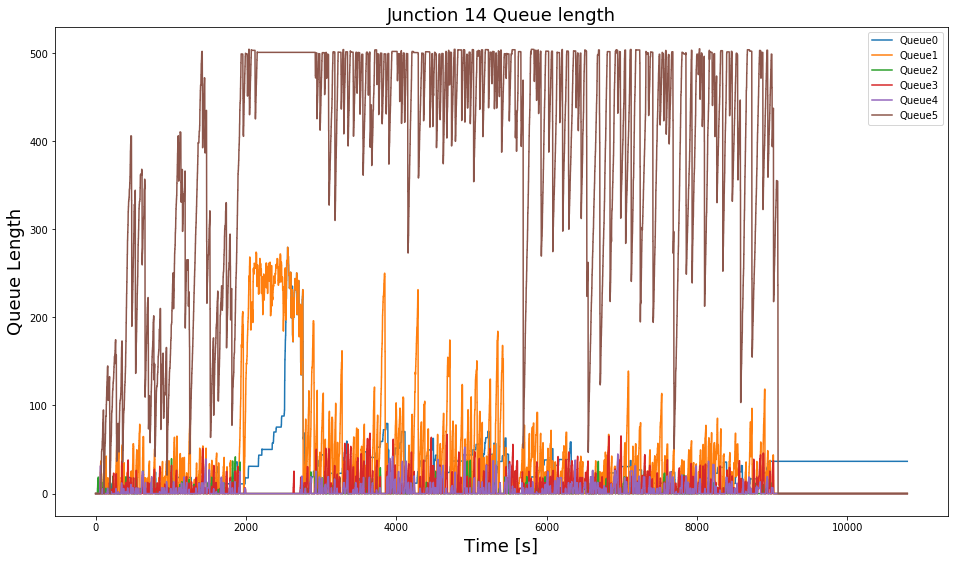

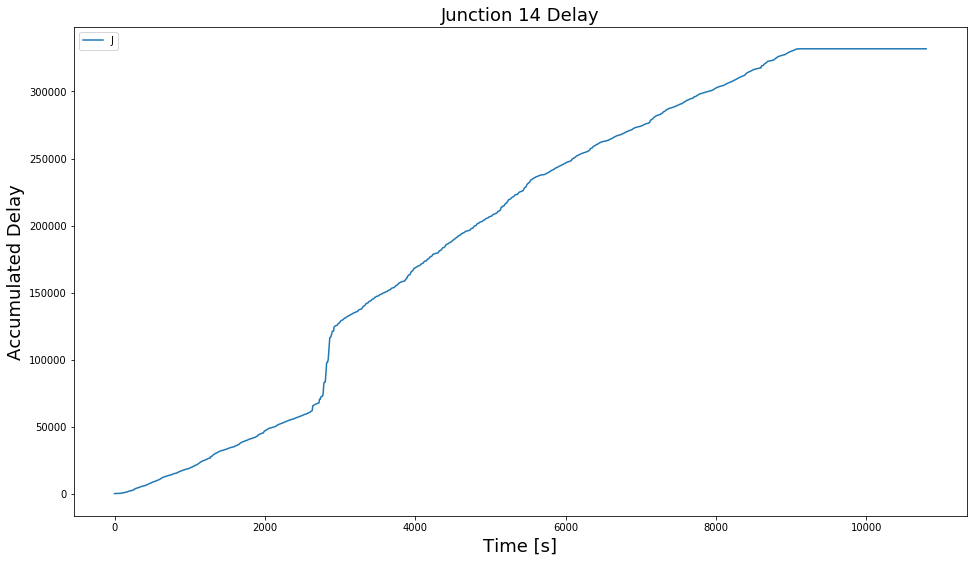

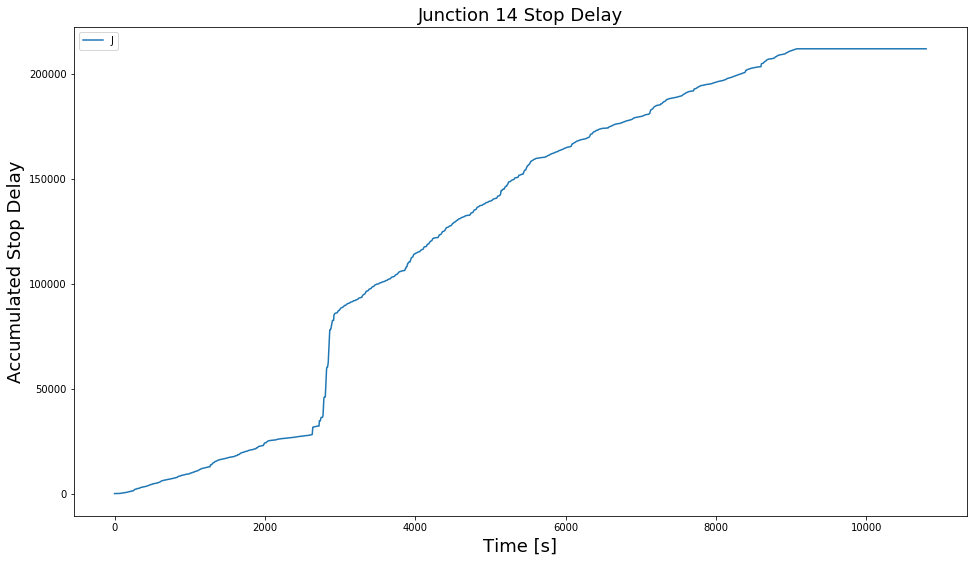

In [25]:
intersection = 14
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 10
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuellingDDQN"
actions = 'all_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "2_4":
    intersection = 2
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_Queues_rework3"
print("Current simulation: {}".format(Session_ID))
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()
Balance_int_MultiDQN_Agents.train(episodes)
Balance_int_MultiDQN_Agents.save(episodes)

## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    
Balance_int_MultiDQN_Agents.load(500, best = True)
Balance_int_MultiDQN_Agents.test()
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Balance_MultiDQN_Agents.Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Balance_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Balance_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()